# Foward Curves and Energy Price Forecast

This notebook shows a few typical patterns for consuming forward curve data

- Find curves
- Latest curve
- Multiple curves on a single date
- Single curve across multiple dates
- Combining with Energy Price Forecast


### Initial Setup


In [1]:
# uncomment below if necessary
# !pip install spgci


In [2]:
import spgci as ci
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date


In [3]:
# uncomment below if necessary
# ci.set_credentials("username", "password", "appkey")
fc = ci.ForwardCurves()


### Finding Curve Codes

An example of using text search on the `get_curves` method to find a relevant curve code.


In [4]:
brent_curves = fc.get_curves(q="Brent Financial", commodity="Crude oil")
brent_curves.head(10)


,commodity,contract_type,currency,curve_code,curve_name,curve_type,delivery_region,derivative_maturity_frequency,holiday_schedule,mdc,mdc_description,uom
0,Crude oil,Swap,USD,CN0PX,Dated Brent at Spore MOC Financial,Relative Forward Curve,North Sea,"[Month, Quarter, Year]",CALSG00,[QDA],[M2M: Oil Forward Curves Asia up to 36 months],BBL
1,Crude oil,Swap,USD,CN0NX,Brent Frontline vs Dubai Frontline at Spore MO...,Relative Forward Curve,North Sea,"[Month, Year, Quarter]",CALSG00,[DA],[Derivatives: Petroleum Asia],BBL
2,Crude oil,Swap,USD,CN0NW,Brent Frontline at Spore MOC Financial Time Sp...,Relative Forward Curve,North Sea,"[Month, Year, Quarter]",CALSG00,[DA],[Derivatives: Petroleum Asia],BBL
3,Crude oil,Swap,USD,CN0NV,Brent Frontline at Spore MOC Financial,Relative Forward Curve,North Sea,"[Month, Year, Quarter]",CALSG00,[DA],[Derivatives: Petroleum Asia],BBL
4,Crude oil,Swap,USD,CN05O,Dated Brent at Houston MOC Financial,Relative Forward Curve,North Sea,"[Quarter, Month, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
5,Crude oil,Swap,USD,CN05I,WTI Frontline vs Brent Frontline at Houston MO...,Relative Forward Curve,Cushing,"[Quarter, Month, Year]",CALUS00,[DU],[Derivatives: Petroleum Americas],BBL
6,Crude oil,Swap,USD,CN03W,Brent Frontline at Houston MOC Financial Time ...,Relative Forward Curve,North Sea,"[Month, Quarter, Year]",CALUS00,[DU],[Derivatives: Petroleum Americas],BBL
7,Crude oil,Swap,USD,CN03V,Brent Frontline at Houston MOC Financial,Relative Forward Curve,North Sea,"[Quarter, Month, Year]",CALUS00,[DU],[Derivatives: Petroleum Americas],BBL
8,Crude oil,Swap,USD,CN01Y,WTI Frontline vs Brent Frontline at London MOC...,Relative Forward Curve,Cushing,"[Month, Quarter, Year]",CALLN00,[DR],[Derivatives: Petroleum EMEA],BBL
9,Crude oil,Swap,USD,CN006,Dated Brent Financial,Relative Forward Curve,North Sea,"[Week, Year, Month, Quarter]",CALLN00,"[CRU, DR]","[MI Crude, Derivatives: Petroleum EMEA]",BBL


In [5]:
dbf = brent_curves.iloc[9]
print(dbf)


commodity                                                      Crude oil
contract_type                                                       Swap
currency                                                             USD
curve_code                                                         CN006
curve_name                                         Dated Brent Financial
curve_type                                        Relative Forward Curve
delivery_region                                                North Sea
derivative_maturity_frequency               [Week, Year, Month, Quarter]
holiday_schedule                                                 CALLN00
mdc                                                            [CRU, DR]
mdc_description                  [MI Crude, Derivatives: Petroleum EMEA]
uom                                                                  BBL
Name: 9, dtype: object


### Getting Asessments for Curve

Using the seleted curve code (`CN006 - Dated Brent Financial`) to get monthly assessments and plotting the curve.


In [6]:
df = fc.get_assessments(
    curve_code=dbf["curve_code"], derivative_maturity_frequency=fc.MatFrequency.Month
)
df.head()


,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,contract_label,assessDate,value,bate,roll_date,expiry_date
0,BDLBM00,CN006,Dated Brent Financial,Month,0,Balmo,2023-04-18,86.24,c,NaT,NaT
1,BDLM001,CN006,Dated Brent Financial,Month,1,MAY 2023,2023-04-18,85.06,c,2023-04-03,2023-04-28
2,BDLM002,CN006,Dated Brent Financial,Month,2,JUN 2023,2023-04-18,84.52,c,2023-05-02,2023-05-31
3,BDLM003,CN006,Dated Brent Financial,Month,3,JUL 2023,2023-04-18,84.10,c,2023-06-01,2023-06-30
4,BDLM004,CN006,Dated Brent Financial,Month,4,AUG 2023,2023-04-18,83.62,c,2023-07-03,2023-07-31


<Axes: xlabel='contract_label'>

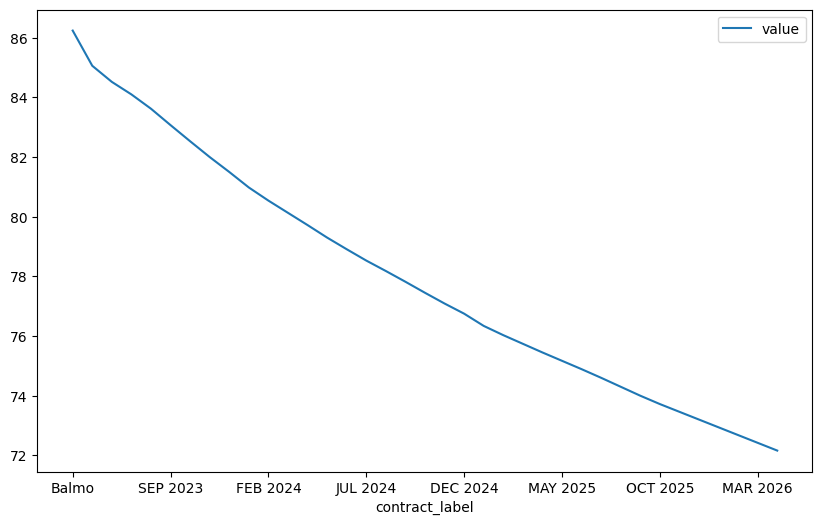

In [7]:
df = df.sort_values("derivative_position", ascending=True)
df.plot(x="contract_label", y="value", figsize=(10, 6))


### Multiple Curves

- Finding a few curves to use
- Getting monthly assessments for those curves
- Joining (1) and (2) in order to get Currency and UOM
- Pivoting and Plotting


In [8]:
curves_240 = fc.get_curves(mdc="QDG", commodity="Crude oil")
curves_240.head()


,commodity,contract_type,currency,curve_code,curve_name,curve_type,delivery_region,derivative_maturity_frequency,holiday_schedule,mdc,mdc_description,uom
0,Crude oil,Swap,USD,CN2RJ,Mars M2M Financial,Relative Forward Curve,Clovelly,[Month],CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
1,Crude oil,Swap,USD,CN2GP,Magellan East Houston M2M Financial,Relative Forward Curve,Houston,[Month],CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
2,Crude oil,Swap,USD,CN0RO,WTI Midland Financial,Relative Forward Curve,Midland,[Month],CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
3,Crude oil,Swap,USD,CN0Q1,WTI Frontline at Spore MOC Financial,Relative Forward Curve,Cushing,"[Month, Year, Quarter]",CALSG00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
4,Crude oil,Swap,USD,CN06D,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL


In [9]:
df_multicurve = fc.get_assessments(
    curve_code=curves_240.iloc[:5]["curve_code"], derivative_maturity_frequency="Month"
)
df_multicurve.head()


,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,roll_date,expiry_date,contract_label,assessDate,value,bate
0,QWTSP01,CN06D,West Texas Sour Crude Financial,Month,1,2023-04-03,2023-04-28,MAY 2023,2023-04-17,80.330,c
1,QWTSP02,CN06D,West Texas Sour Crude Financial,Month,2,2023-05-01,2023-05-31,JUN 2023,2023-04-17,79.880,c
2,QWTSP03,CN06D,West Texas Sour Crude Financial,Month,3,2023-06-01,2023-06-30,JUL 2023,2023-04-17,80.121,c
3,QWTSP04,CN06D,West Texas Sour Crude Financial,Month,4,2023-07-05,2023-07-31,AUG 2023,2023-04-17,79.381,c
4,QWTSP05,CN06D,West Texas Sour Crude Financial,Month,5,2023-08-01,2023-08-31,SEP 2023,2023-04-17,78.678,c


joining the data so that the asssessments are linked to reference data fields such as currency and unit of measure.


In [10]:
joined = df_multicurve.merge(curves_240, on="curve_code", suffixes=("", "_y"))
joined.head()


,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,roll_date,expiry_date,contract_label,assessDate,value,...,contract_type,currency,curve_name_y,curve_type,delivery_region,derivative_maturity_frequency_y,holiday_schedule,mdc,mdc_description,uom
0,QWTSP01,CN06D,West Texas Sour Crude Financial,Month,1,2023-04-03,2023-04-28,MAY 2023,2023-04-17,80.330,...,Swap,USD,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
1,QWTSP02,CN06D,West Texas Sour Crude Financial,Month,2,2023-05-01,2023-05-31,JUN 2023,2023-04-17,79.880,...,Swap,USD,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
2,QWTSP03,CN06D,West Texas Sour Crude Financial,Month,3,2023-06-01,2023-06-30,JUL 2023,2023-04-17,80.121,...,Swap,USD,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
3,QWTSP04,CN06D,West Texas Sour Crude Financial,Month,4,2023-07-05,2023-07-31,AUG 2023,2023-04-17,79.381,...,Swap,USD,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
4,QWTSP05,CN06D,West Texas Sour Crude Financial,Month,5,2023-08-01,2023-08-31,SEP 2023,2023-04-17,78.678,...,Swap,USD,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL


In [11]:
pt = joined.pivot_table(
    index="derivative_position",
    columns=["curve_name", "curve_code", "uom", "currency"],
    values="value",
)
pt


curve_name,Magellan East Houston M2M Financial,Mars M2M Financial,WTI Frontline at Spore MOC Financial,WTI Midland Financial,West Texas Sour Crude Financial
curve_code,CN2GP,CN2RJ,CN0Q1,CN0RO,CN06D
uom,BBL,BBL,BBL,BBL,BBL
currency,USD,USD,USD,USD,USD
derivative_position,,,,,
1,81.580,80.280,80.680,81.430,80.330
2,81.880,77.846,80.680,81.680,79.880
3,81.486,77.552,80.440,81.259,80.121
4,81.014,77.154,79.826,80.746,79.381
5,80.409,76.660,79.151,80.136,78.678
...,...,...,...,...,...


<Axes: xlabel='derivative_position'>

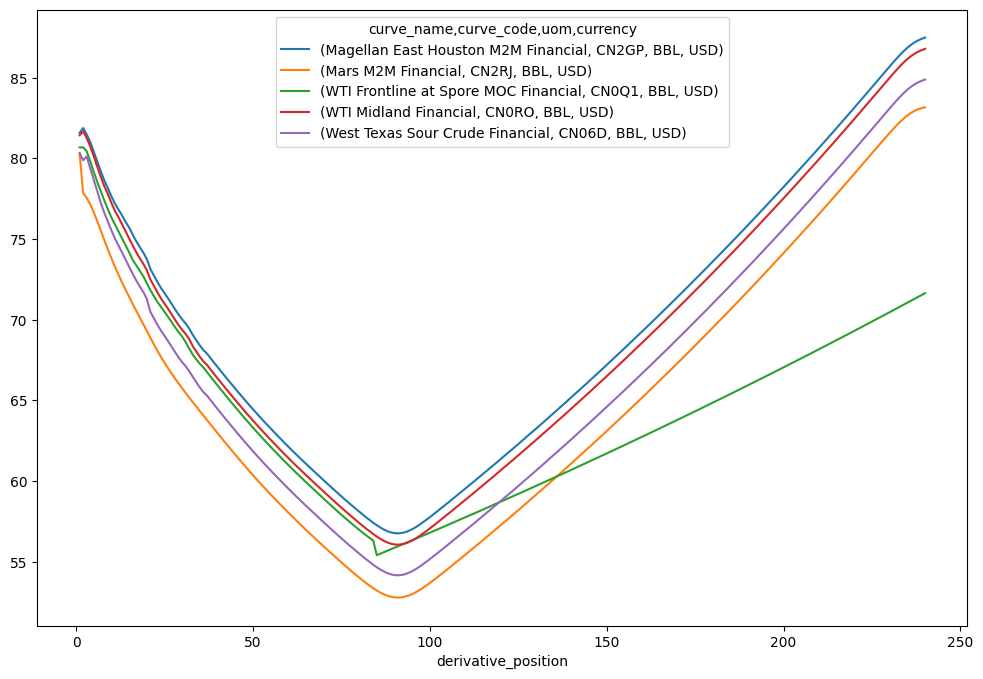

In [12]:
pt.plot(figsize=(12, 8))


### Single Curve with Historical Data

- Fetching data for a single curve
- Grouping the data
- Pivoting
- Plotting


In [13]:
start_dt = date(2021, 1, 1)
end_dt = date.today()
df_hist = fc.get_assessments(
    curve_code="CN006",
    assess_date_gte=start_dt,
    assess_date_lte=end_dt,
    derivative_maturity_frequency="Month",
    paginate=True,
)  # note paginate=True to fetch ALL data

df_hist.info()


Fetching...: 100%|██████████| 3/3 [00:04<00:00,  2.04s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21155 entries, 0 to 21154
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   symbol                         21155 non-null  object        
 1   curve_code                     21155 non-null  object        
 2   curve_name                     21155 non-null  object        
 3   derivative_maturity_frequency  21155 non-null  object        
 4   derivative_position            21155 non-null  int64         
 5   contract_label                 21155 non-null  object        
 6   assessDate                     21155 non-null  datetime64[ns]
 7   value                          21155 non-null  float64       
 8   bate                           21155 non-null  object        
 9   roll_date                      20772 non-null  datetime64[ns]
 10  expiry_date                    20772 non-null  datetime64[ns]
dtypes: datetime64[n

Group by `asessDate` on monthly frequency (one row per month), taking the earliest date for each month. \
This is necessary as sometimes the first of the month is a weekend or holiday.


In [14]:
grp = df_hist.groupby([pd.Grouper(key="assessDate", freq="M")])
filt = grp["assessDate"].transform("min") == df_hist["assessDate"]
df_grouped = df_hist[filt]
df_grouped.head()


,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,contract_label,assessDate,value,bate,roll_date,expiry_date
0,BDLBM00,CN006,Dated Brent Financial,Month,0,Balmo,2021-01-04,50.37,c,NaT,NaT
1,BDLM001,CN006,Dated Brent Financial,Month,1,FEB 2021,2021-01-04,50.40,c,2021-01-04,2021-01-29
2,BDLM002,CN006,Dated Brent Financial,Month,2,MAR 2021,2021-01-04,50.48,c,2021-02-01,2021-02-26
3,BDLM003,CN006,Dated Brent Financial,Month,3,APR 2021,2021-01-04,50.53,c,2021-03-01,2021-03-31
4,BDLM004,CN006,Dated Brent Financial,Month,4,MAY 2021,2021-01-04,50.41,c,2021-04-01,2021-04-30


In [15]:
pt = df_grouped.pivot_table(
    index="derivative_position", columns="assessDate", values="value"
)
pt.head()


assessDate,2021-01-04,2021-02-01,2021-03-01,2021-04-01,2021-05-04,2021-06-01,2021-07-01,2021-08-02,2021-09-01,2021-10-01,...,2022-07-01,2022-08-01,2022-09-01,2022-10-03,2022-11-01,2022-12-01,2023-01-03,2023-02-01,2023-03-01,2023-04-03
derivative_position,,,,,,,,,,,,,,,,,,,,,
0,50.37,55.69,64.93,62.14,68.81,69.80,76.23,73.32,70.62,78.81,...,117.92,103.89,92.64,89.19,95.39,87.82,82.03,83.50,83.22,85.11
1,50.40,55.31,64.24,62.31,68.13,69.90,75.11,72.48,70.32,78.12,...,111.55,99.28,92.02,87.51,94.25,87.15,82.34,83.53,82.73,84.60
2,50.48,55.08,63.64,62.03,67.78,69.46,74.30,71.81,69.77,77.37,...,106.99,96.82,91.01,86.15,92.37,87.11,82.31,83.36,82.38,84.13
3,50.53,54.78,62.94,61.76,67.30,68.94,73.56,71.09,69.28,76.56,...,103.92,95.19,90.09,84.52,90.85,87.13,82.22,83.31,82.06,83.64
4,50.41,54.46,62.39,61.37,66.81,68.43,72.79,70.49,68.79,75.93,...,101.34,93.86,88.98,83.29,89.40,86.90,82.12,83.07,81.69,83.09


Plotting the results.

Each subplot is the curve as it looks on the first assessment day of the month.


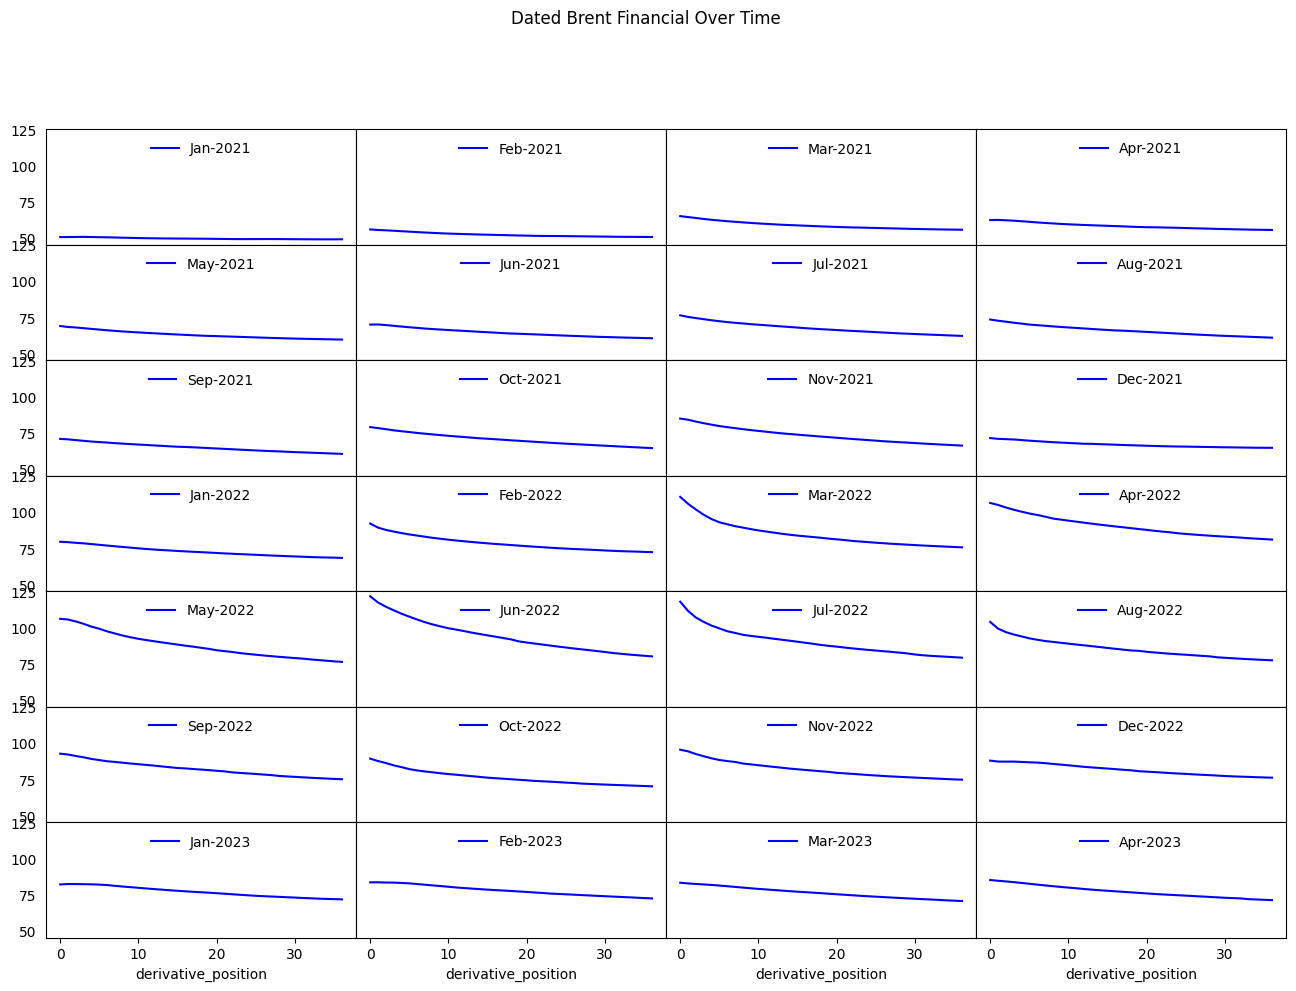

In [16]:
axes = pt.plot.line(
    subplots=True,
    layout=(8, 4),
    sharex=True,
    sharey=True,
    figsize=(16, 12),
    title="Dated Brent Financial Over Time",
    color="blue",
)
plt.subplots_adjust(hspace=0, wspace=0)

for i, ax in enumerate(axes.flat):
    try:
        label = pt.columns[i].strftime("%b-%Y")
    except:
        label = ""
    ax.yaxis.set_ticks_position("none")
    ax.legend([label], frameon=False, loc="upper center")


### Adding  Energy Price Forecast

Comparing a Forward Curve with our Energy Forecast.


In [17]:
epf = ci.EnergyPriceForecast()


get monthly forecast for Brent (PCAAS00)


In [18]:
brent_forecast = epf.get_prices_shortterm(
    symbol="PCAAS00", sector="Crude", year_gte=2023
)
brent_forecast.head()


,year,month,categoryName,groupName,priceName,priceSymbol,price,unitName,unitId,currencySymbol,...,priceCategoryCode,priceGroupCode,currencyCode,modifiedDate,sectorId,sectorName,deliveryRegionId,deliveryRegionName,commodityId,commodityName
0,2024,12,Oil,Crude,Dated Brent,PCAAS00,87.0,BBL,1,USD,...,1,1,0,2023-04-06,10,Crude,61,North Sea,15,Crude oil
1,2024,11,Oil,Crude,Dated Brent,PCAAS00,89.0,BBL,1,USD,...,1,1,0,2023-04-06,10,Crude,61,North Sea,15,Crude oil
2,2024,10,Oil,Crude,Dated Brent,PCAAS00,90.0,BBL,1,USD,...,1,1,0,2023-04-06,10,Crude,61,North Sea,15,Crude oil
3,2024,9,Oil,Crude,Dated Brent,PCAAS00,89.0,BBL,1,USD,...,1,1,0,2023-04-06,10,Crude,61,North Sea,15,Crude oil
4,2024,8,Oil,Crude,Dated Brent,PCAAS00,88.0,BBL,1,USD,...,1,1,0,2023-04-06,10,Crude,61,North Sea,15,Crude oil


Combine year and month into a single field to make it easier to join later.


In [19]:
brent_forecast["date"] = pd.to_datetime(
    brent_forecast["month"].astype(str) + "/" + brent_forecast["year"].astype(str)
)
brent_forecast.head()


,year,month,categoryName,groupName,priceName,priceSymbol,price,unitName,unitId,currencySymbol,...,priceGroupCode,currencyCode,modifiedDate,sectorId,sectorName,deliveryRegionId,deliveryRegionName,commodityId,commodityName,date
0,2024,12,Oil,Crude,Dated Brent,PCAAS00,87.0,BBL,1,USD,...,1,0,2023-04-06,10,Crude,61,North Sea,15,Crude oil,2024-12-01
1,2024,11,Oil,Crude,Dated Brent,PCAAS00,89.0,BBL,1,USD,...,1,0,2023-04-06,10,Crude,61,North Sea,15,Crude oil,2024-11-01
2,2024,10,Oil,Crude,Dated Brent,PCAAS00,90.0,BBL,1,USD,...,1,0,2023-04-06,10,Crude,61,North Sea,15,Crude oil,2024-10-01
3,2024,9,Oil,Crude,Dated Brent,PCAAS00,89.0,BBL,1,USD,...,1,0,2023-04-06,10,Crude,61,North Sea,15,Crude oil,2024-09-01
4,2024,8,Oil,Crude,Dated Brent,PCAAS00,88.0,BBL,1,USD,...,1,0,2023-04-06,10,Crude,61,North Sea,15,Crude oil,2024-08-01


Get the forward curve as it looked on the forecast date (`brent_forecast.iloc[0]['modifiedDate']`)


In [20]:
brent_fc = fc.get_assessments(
    curve_code="CN006",
    assess_date=brent_forecast.iloc[0]["modifiedDate"],
    derivative_maturity_frequency="Month",
)
brent_fc.head()


,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,contract_label,assessDate,value,bate,roll_date,expiry_date
0,BDLBM00,CN006,Dated Brent Financial,Month,0,Balmo,2023-04-06,86.05,c,NaT,NaT
1,BDLM001,CN006,Dated Brent Financial,Month,1,MAY 2023,2023-04-06,85.21,c,2023-04-03,2023-04-28
2,BDLM002,CN006,Dated Brent Financial,Month,2,JUN 2023,2023-04-06,84.54,c,2023-05-02,2023-05-31
3,BDLM003,CN006,Dated Brent Financial,Month,3,JUL 2023,2023-04-06,84.03,c,2023-06-01,2023-06-30
4,BDLM004,CN006,Dated Brent Financial,Month,4,AUG 2023,2023-04-06,83.39,c,2023-07-03,2023-07-31


In [21]:
brent_fc["label_to_date"] = pd.to_datetime(brent_fc["contract_label"], errors="coerce")
brent_fc.head()


,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,contract_label,assessDate,value,bate,roll_date,expiry_date,label_to_date
0,BDLBM00,CN006,Dated Brent Financial,Month,0,Balmo,2023-04-06,86.05,c,NaT,NaT,NaT
1,BDLM001,CN006,Dated Brent Financial,Month,1,MAY 2023,2023-04-06,85.21,c,2023-04-03,2023-04-28,2023-05-01
2,BDLM002,CN006,Dated Brent Financial,Month,2,JUN 2023,2023-04-06,84.54,c,2023-05-02,2023-05-31,2023-06-01
3,BDLM003,CN006,Dated Brent Financial,Month,3,JUL 2023,2023-04-06,84.03,c,2023-06-01,2023-06-30,2023-07-01
4,BDLM004,CN006,Dated Brent Financial,Month,4,AUG 2023,2023-04-06,83.39,c,2023-07-03,2023-07-31,2023-08-01


joining the two tables, energy price forecast and forward curves and plotting the results.

In [22]:
joined = brent_fc.merge(
    brent_forecast, left_on="label_to_date", right_on="date", how="left"
)
joined = joined[["contract_label", "value", "price", "label_to_date"]]
joined.columns = ["contract_label", "value", "forecast", "date"]
joined.head()


,contract_label,value,forecast,date
0,Balmo,86.05,NaN,NaT
1,MAY 2023,85.21,85.0,2023-05-01
2,JUN 2023,84.54,88.0,2023-06-01
3,JUL 2023,84.03,89.0,2023-07-01
4,AUG 2023,83.39,91.0,2023-08-01


<Axes: xlabel='date'>

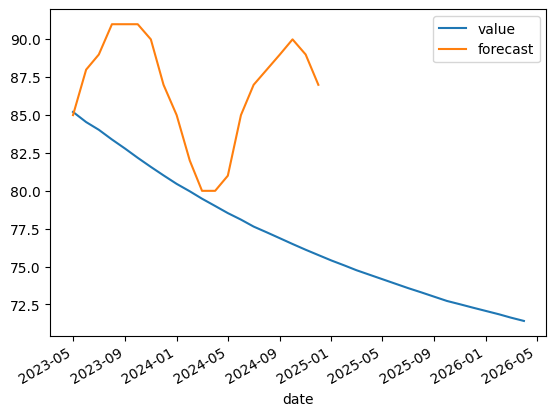

In [23]:
joined.plot(x="date", y=["value", "forecast"])
